In [1]:
from imaster_paper_args import *

In [7]:
nside=512
window_lmax=nside
use_window=False

do_pseudo_cl=False
do_xi=True

bin_cl=True
bin_xi=True

use_binned_l=False
use_binned_theta=False

do_cov=False

In [20]:
z0=1 #1087
# zs_bin1=source_tomo_bins(zp=[z0],p_zp=np.array([1]),ns=30,use_window=use_window,nside=nside)
shear_zbins=lsst_source_tomo_bins(nbins=1,use_window=True,nside=nside,f_sky=f_sky)
galaxy_zbins=shear_zbins

ns0:  27.0
[0.10002    0.10082016 0.10162032 ... 2.99819964 2.9989998  2.99979996] 100 5
source_tomo_bins, zmax 5.0 2.999799959991998 0.5999699939987997
Tracer utils has no tracers
Tracer utils has tracers:  ['galaxy']
pk_params dict was none, intialized with default
cosmo_params dict was none, intialized with default
cosmology interpolation range 0.0 4.005
power spectra camb_pk_too_many_z
Win gen: step size 153 1536 31.0 10
Window done. Size: 0.0


/verafs/scratch/phy200040p/sukhdeep/miniconda3/lib/python3.8/site-packages/skylens-0.1-py3.8.egg/skylens/angular_power_spectra.py:115: RuntimeWarning: divide by zero encountered in true_divide


scatter_dict got empty dictionary
cl graph done
gather_dict got empty dictionary


/verafs/home/sukhdeep/.local/lib/python3.8/site-packages/healpy-1.14.0-py3.8-linux-x86_64.egg/healpy/sphtfunc.py:433: FutureChangeWarning: The order of the input cl's will change in a future release.
Use new=True keyword to start using the new order.
See documentation of healpy.synalm.
  warnings.warn(
/verafs/home/sukhdeep/.local/lib/python3.8/site-packages/healpy-1.14.0-py3.8-linux-x86_64.egg/healpy/sphtfunc.py:822: UserWarning: Sigma is 0.000000 arcmin (0.000000 rad) 
  warnings.warn(
/verafs/home/sukhdeep/.local/lib/python3.8/site-packages/healpy-1.14.0-py3.8-linux-x86_64.egg/healpy/sphtfunc.py:827: UserWarning: -> fwhm is 0.000000 arcmin
  warnings.warn(
/verafs/scratch/phy200040p/sukhdeep/project/skylens/skylens/survey_utils.py:126: RuntimeWarning: invalid value encountered in sqrt
  cl_map_noise=np.sqrt(cl_map)
/verafs/scratch/phy200040p/sukhdeep/project/skylens/skylens/survey_utils.py:132: RuntimeWarning: invalid value encountered in sqrt
  shear_zbins[i]['window_N']=np.sqrt(sh

In [9]:
corrs=[corr_gg]#corr_ll,corr_gg,corr_ggl]

In [10]:
bi=(0,0)
corr=corrs[0]
s=s1_s2s[corr]
if corr==corr_ll:
    s=(2,2)

In [11]:
#setup parameters
lmax_cl=3000 #2000
lmin_cl=0
l0=np.arange(lmin_cl,lmax_cl)

lmin_cl_Bins=lmin_cl+1
lmax_cl_Bins=lmax_cl-1
Nl_bins=50
# l_bins=get_l_bins(l_min=lmin_cl_Bins,l_max=lmax_cl_Bins,N_bins=Nl_bins,binning_scheme='log',min_modes=50)#,binning_mode='decreasing')
l_bins=np.unique(np.int64(np.logspace(np.log10(lmin_cl_Bins),np.log10(lmax_cl_Bins),Nl_bins+1)))
lb=.5*(l_bins[1:]+l_bins[:-1])
l_bins_center=lb*1
Nl_bins=len(lb)

# l=np.unique(np.int64(np.logspace(np.log10(lmin_cl),np.log10(lmax_cl),Nl_bins*20))) #if we want to use fewer ell
l=l0

In [12]:
theta_min=0.01/60
# theta_min=hp.nside2resol(512, arcmin = True)/60 #100/nside #1./60
theta_max=1200./60
n_theta_bins=151
# theta_bins,th=get_theta_bins(theta_min=theta_min,theta_max=theta_max,N_bins=n_theta_bins,binning_scheme='log',n_theta_samples=40)#,max_modes=1)
theta_bins=np.logspace(np.log10(theta_min),np.log10(theta_max),n_theta_bins+1)
th=np.logspace(np.log10(theta_min),np.log10(theta_max),n_theta_bins*40)
theta_bins_center=0.5*(theta_bins[1:]+theta_bins[:-1])
thb=theta_bins_center*1
n_theta_bins=len(thb)

In [ ]:
bin_xi=True
bin_cl=True
theta_min2=.05/60
# theta_min=hp.nside2resol(512, arcmin = True)/60 #100/nside #1./60
theta_max2=600./60
n_theta_bins=25
# theta_bins,th=get_theta_bins(theta_min=theta_min,theta_max=theta_max,N_bins=n_theta_bins,binning_scheme='log',n_theta_samples=40)#,max_modes=1)
theta_bins2=np.logspace(np.log10(theta_min2),np.log10(theta_max2),n_theta_bins+1)
th2=np.logspace(np.log10(theta_min2),np.log10(theta_max2),n_theta_bins*80)
# th2_2=np.logspace(np.log10(theta_min2*.01),np.log10(theta_min2),40)
# th2_2=np.append([0],th2_2)
# th2=np.sort(np.unique(np.append(th2_2,th2)))
thb2=0.5*(theta_bins2[1:]+theta_bins2[:-1])
n_theta_bins=len(thb2)

l0_2=np.arange(1e4)

#Hankel Transform setup
WT_kwargs2={'l':l0_2,'theta':th2*d2r,'s1_s2':[(2,2),(2,-2),(0,0),(0,2),(2,0)],
           'wig_d_taper_order_low':None,'wig_d_taper_order_high':None}
# if globals().get('WT') is None:
WT2=wigner_transform(**WT_kwargs2 )
WT2.gather_data()

/verafs/scratch/phy200040p/sukhdeep/miniconda3/lib/python3.8/site-packages/skylens-0.1-py3.8.egg/skylens/wigner_functions.py:46: RuntimeWarning: invalid value encountered in true_divide


In [15]:
bb=binning()
xi_bu=bb.bin_utils(r=th2,r_bins=theta_bins2,mat_dims=[1,2])

In [16]:
corrs=[corr_gg,corr_ll,corr_ggl]

In [17]:
SL_xi0_2=Skylens(shear_zbins=shear_zbins,do_cov=do_cov,bin_cl=bin_cl,l_bins=l_bins,l=l0_2, galaxy_zbins=galaxy_zbins,corrs=corrs,
                       use_window=use_window,Tri_cov=Tri_cov,
                       SSV_cov=SSV_cov,tidal_SSV_cov=tidal_SSV_cov,f_sky=0.35,
                       store_win=store_win,window_lmax=window_lmax,
                      do_xi=do_xi,bin_xi=True,theta_bins=th2,WT=WT2,
                      use_binned_l=False,use_binned_theta=False,
                      nz_PS=10,do_pseudo_cl=False)

Tracer utils has tracers:  ['shear', 'galaxy']
pk_params dict was none, intialized with default
cosmo_params dict was none, intialized with default
cosmology interpolation range 0.0 4.005
power spectra camb_pk_too_many_z
Win gen: step size 1 10000 513.0 10
Window done. Size: 0.0


/verafs/scratch/phy200040p/sukhdeep/miniconda3/lib/python3.8/site-packages/skylens-0.1-py3.8.egg/skylens/cov_utils.py:92: RuntimeWarning: invalid value encountered in true_divide
/verafs/scratch/phy200040p/sukhdeep/miniconda3/lib/python3.8/site-packages/skylens-0.1-py3.8.egg/skylens/angular_power_spectra.py:23: RuntimeWarning: divide by zero encountered in true_divide


In [18]:
shear_zbins[0].keys()

dict_keys(['z', 'dz', 'nz', 'ns', 'W', 'pz', 'pzdz', 'Norm', 'b1', 'bz1', 'AI', 'AI_z', 'mag_fact', 'shear_m_bias', 'lm', 'k_max'])

In [28]:
wlt0=hp.anafast(shear_zbins[0]['window'])
window0=np.ones_like(shear_zbins[0]['window'])
wlt00=hp.anafast(window0)

In [30]:
wlt0=wlt00

[]

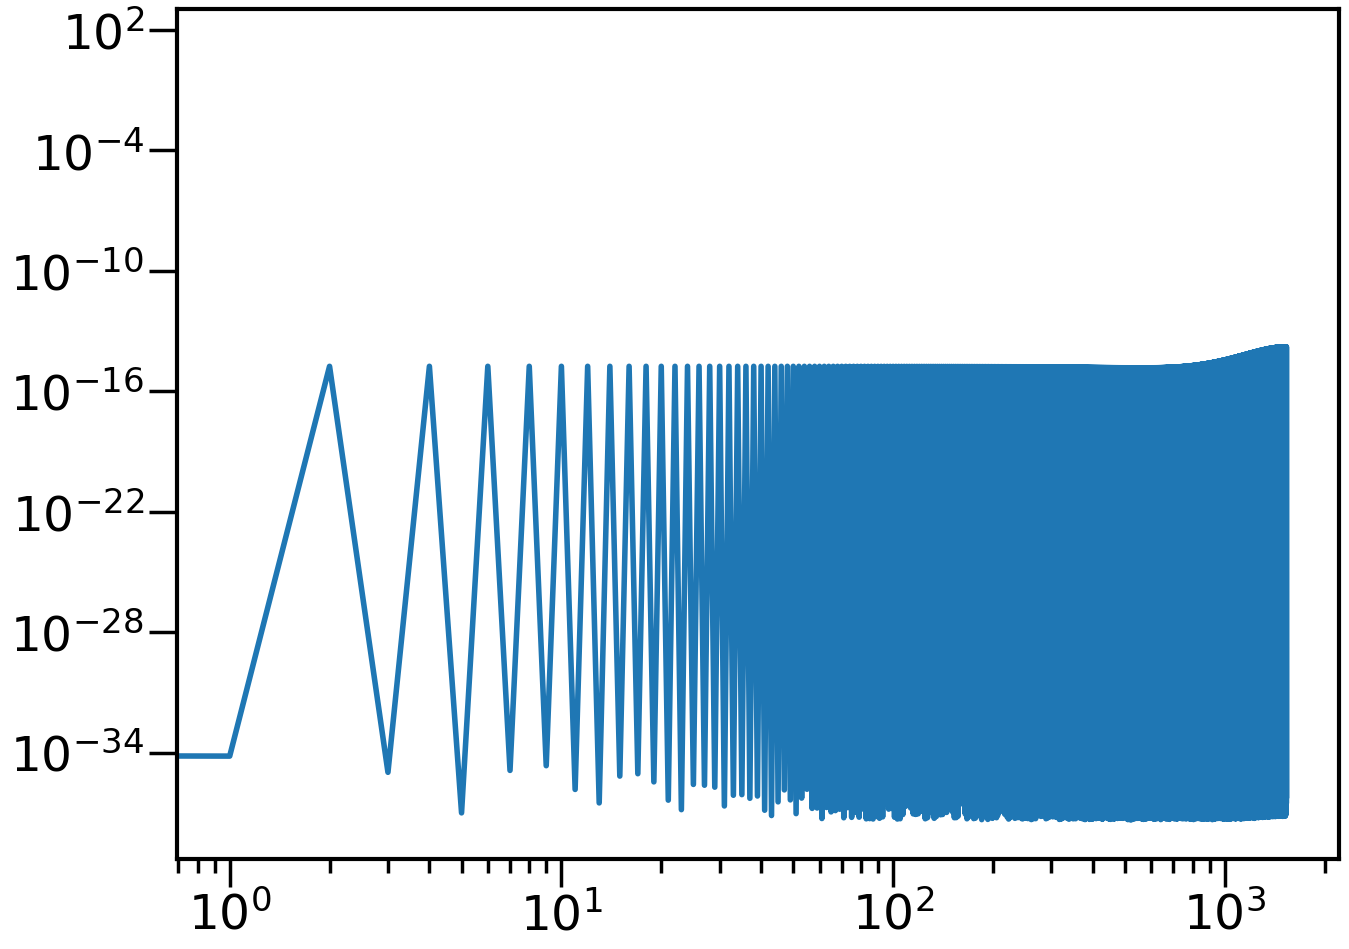

In [31]:
plot(wlt0)
loglog()

In [32]:
tht,xi_00=WT2.projected_correlation(l_cl=np.arange(len(wlt0)),cl=wlt0,s1_s2=(0,0))
tht,xi_02=WT2.projected_correlation(l_cl=np.arange(len(wlt0)),cl=wlt0,s1_s2=(0,2))
tht,xi_22=WT2.projected_correlation(l_cl=np.arange(len(wlt0)),cl=wlt0,s1_s2=(2,2))

[]

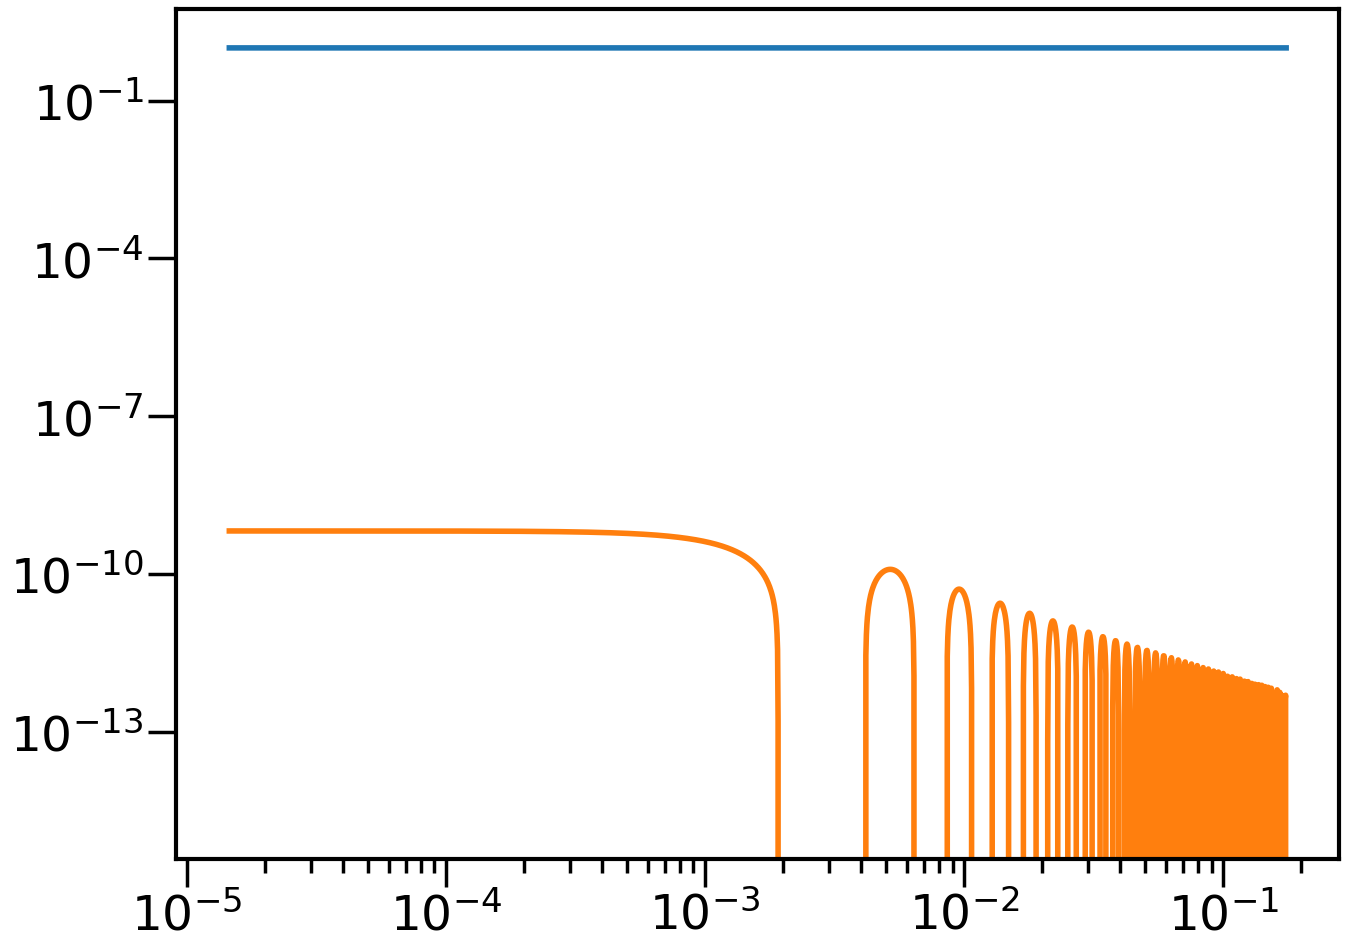

In [33]:
plot(tht,xi_00)
plot(tht,xi_22)
loglog()

In [17]:
xi0_2G=SL_xi0_2.xi_tomo()
# %time xiH_b2=xiHG_b2['stack'].compute()
%time xi0_2=client.compute(xi0_2G['xi']).result()

/verafs/scratch/phy200040p/sukhdeep/miniconda3/lib/python3.8/site-packages/skylens-0.1-py3.8.egg/skylens/angular_power_spectra.py:115: RuntimeWarning: divide by zero encountered in true_divide


scatter_dict got empty dictionary
cl graph done
gather_dict got empty dictionary
Done xi graph 0.002397 960.816
CPU times: user 156 ms, sys: 785 ms, total: 941 ms
Wall time: 1.39 s


In [18]:
clG_2=SL_xi0_2.cl_tomo()
# %time xiH_b2=xiHG_b2['stack'].compute()
%time cl0_2=client.compute(clG_2['cl']).result()

scatter_dict got empty dictionary
cl graph done
gather_dict got empty dictionary
CPU times: user 35.9 ms, sys: 3.71 ms, total: 39.6 ms
Wall time: 310 ms


In [19]:
l0_2=np.int64(l0_2)

In [133]:
l0.max(),l0_2.max()

(2999, 9999)

In [221]:
def l_cut_coupling2(WT,l_cl=None,theta_out=None,l_cut_weights=None,s1_s2=None,taper=False,**kwargs):
        self=WT
        if l_cut_weights is None:
            l_cl=self.l
            l_cut_weights=self.l_cut_weights
        if s1_s2 is None:
            s1_s2=self.s1_s2s
        theta_coupling={}
        theta_coupling_mat={}
        for (m1,m2) in s1_s2:
            lw=l_cut_weights*1.
            dth=2*np.pi*np.gradient(theta_out)*np.sin(theta_out)
            s=(m1,m2) #(0,0)
            th,theta_coupling[(m1,m2)]=self.projected_correlation(l_cl=l_cl,cl=lw,taper=taper,s1_s2=s,**kwargs)
            th,theta_coupling_mat[(m1,m2)]=self.projected_covariance(l_cl=l_cl,cl_cov=lw,taper=taper,s1_s2=s,**kwargs)
            theta_coupling_mat[(m1,m2)]*=dth
        return theta_coupling,theta_coupling_mat

In [223]:
l_cut_weights=np.ones_like(l0_2,dtype='float64')

l_max_cut=3000#l0.max()
l_min_cut=np.int(l_max_cut*.66)
x=l0_2<l_min_cut
l_cut_weights[~x]=np.cos((l0_2[~x]*1.-l0_2[x].max())/(l_max_cut-l0_2[x].max())*np.pi/2.)

x=l0_2<l_max_cut
l_cut_weights[~x]=0

thc,thc_m=WT2.l_cut_coupling(l_cl=l0_2,l_cut_weights=l_cut_weights,taper=False)

l_cut_coupling: (2000, 2000) (2000,) (2000, 2000)
l_cut_coupling: (2000, 2000) (2000,) (2000, 2000)
l_cut_coupling: (2000, 2000) (2000,) (2000, 2000)
l_cut_coupling: (2000, 2000) (2000,) (2000, 2000)
l_cut_coupling: (2000, 2000) (2000,) (2000, 2000)


In [224]:
thc2,thc_m2=l_cut_coupling2(WT2,theta_out=th2*d2r,l_cl=l0_2,l_cut_weights=l_cut_weights,taper=False)

In [ ]:
corr=corr_ll
s=(2,-2)

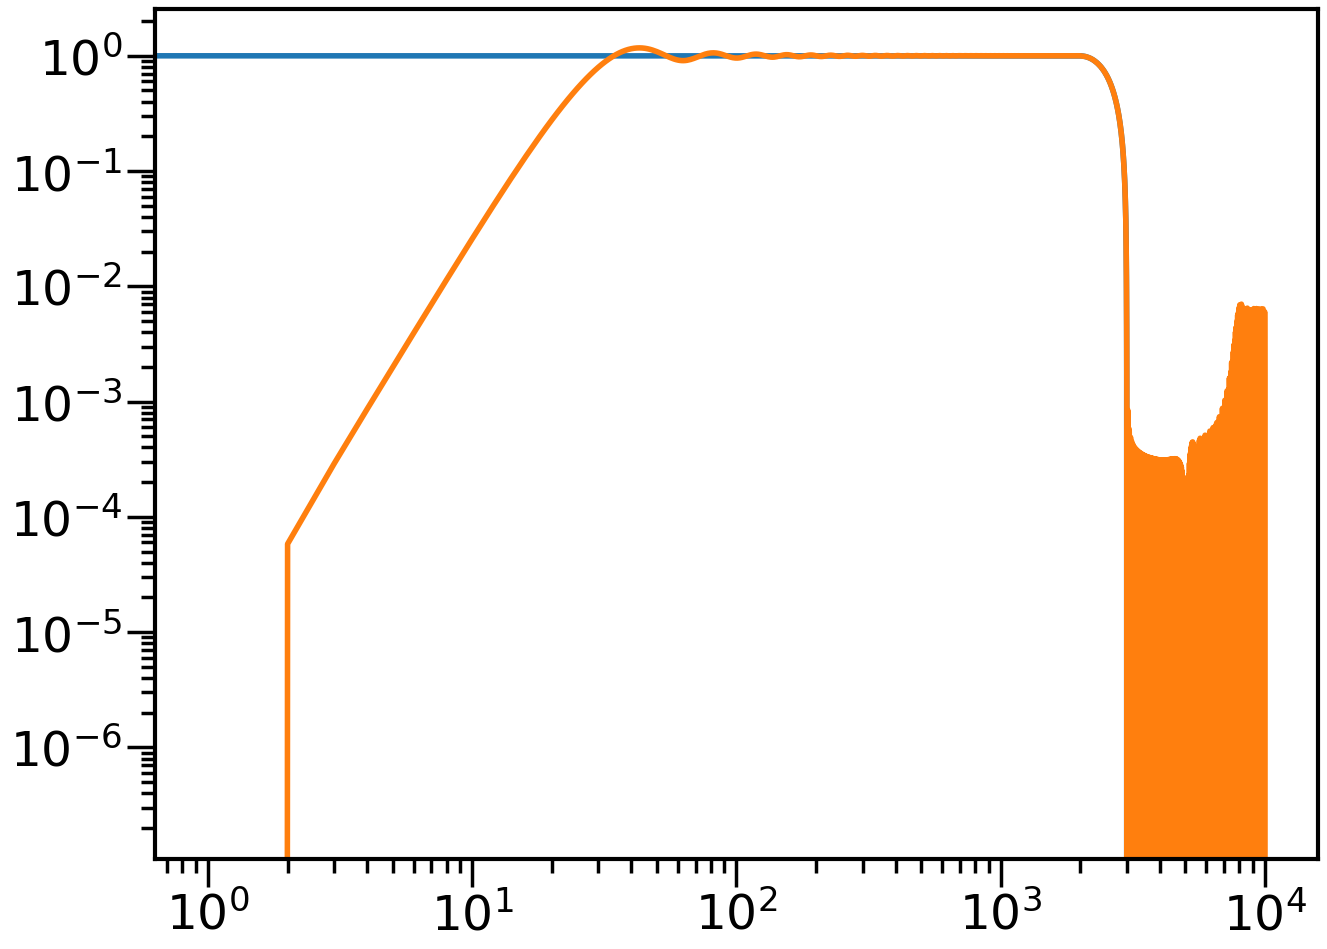

In [141]:
plot(l_cut_weights)
lit,lw2=WT2.inv_projected_correlation(xi=thc2[s],s1_s2=s,theta_xi=th2*d2r)
plot(lw2)
xscale('log')
yscale('log')

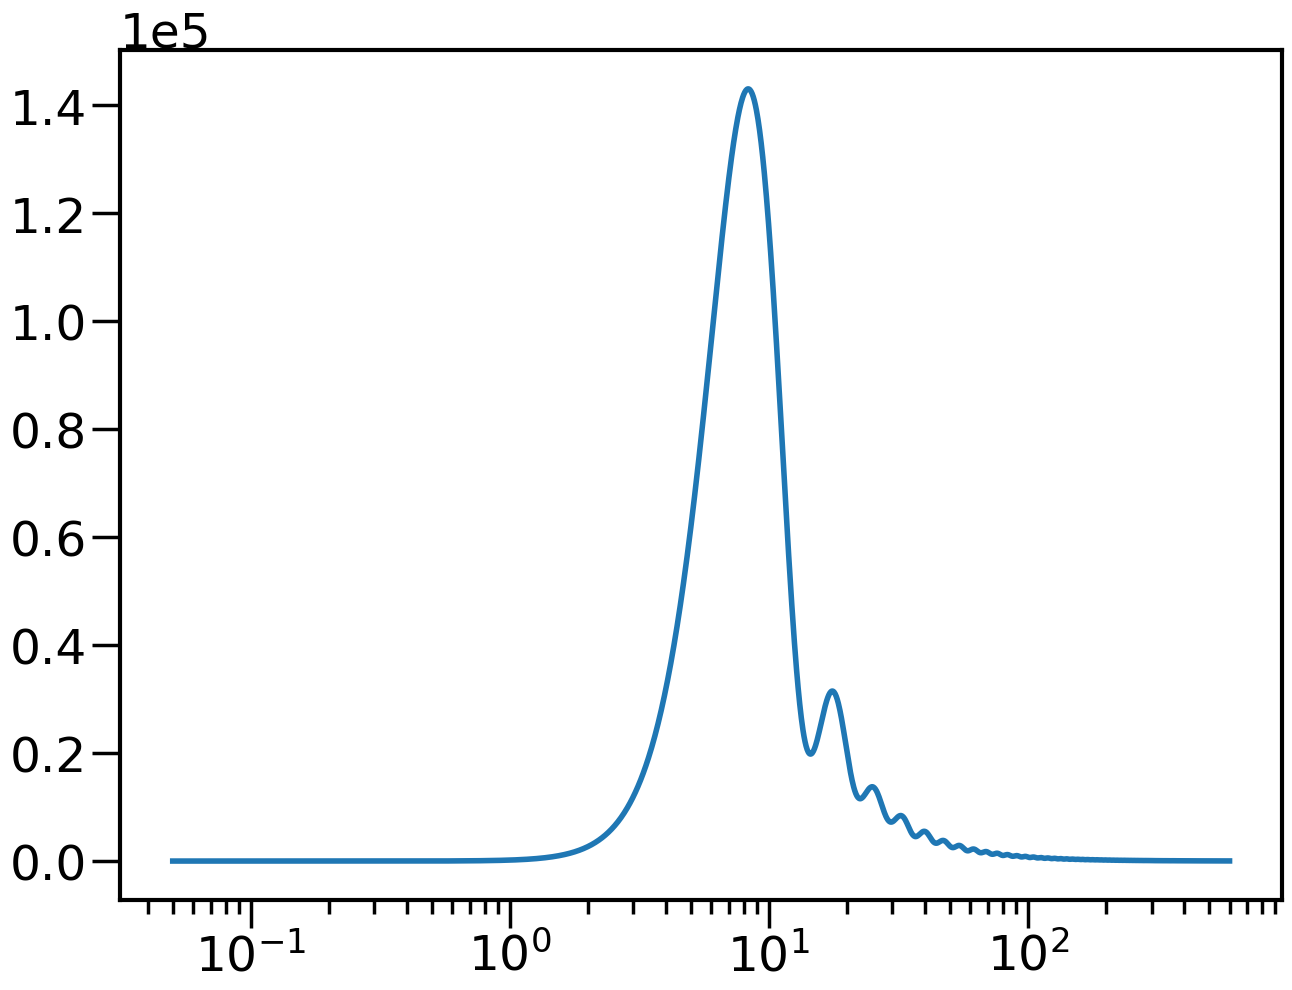

In [142]:
# plot(th2*60,thc[s])
plot(th2*60,thc2[s])
xscale('log')

In [143]:
tt,xi0_2ub=WT2.projected_correlation(l_cl=l0_2,cl=cl0_2[corr][bi],s1_s2=s)
tt,xi0_2ubc=WT2.projected_correlation(l_cl=l0_2,cl=cl0_2[corr][bi]*l_cut_weights,s1_s2=s)

M=thc_m2[s]
xi_c=M@(xi0_2ub)

xi_cb=bb.bin_1d(xi=xi_c,bin_utils=xi_bu)

xi0_2c=bb.bin_1d(xi=xi0_2ubc,bin_utils=xi_bu)
xi0_2=bb.bin_1d(xi=xi0_2ub,bin_utils=xi_bu)

thc_m_b=bb.bin_2d_coupling(M=thc_m2[s],bin_utils=xi_bu,wt_b=1./xi0_2,wt0=xi0_2ub)
xi_cb2=thc_m_b@xi0_2


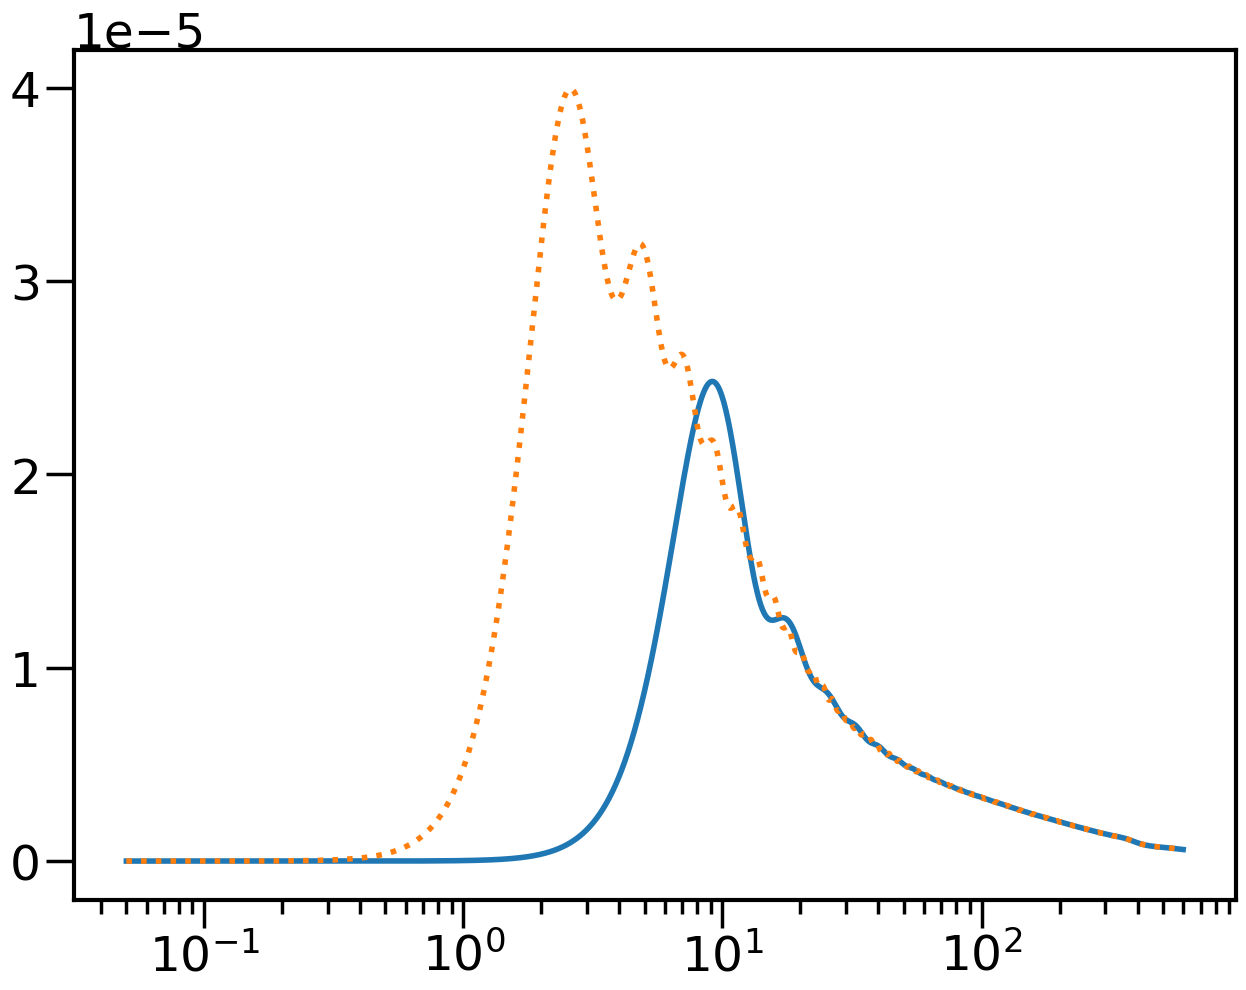

In [144]:
# plot(th2,xi0b2[corr_ll][s][bi]/xi_c0)
# plot(th2,xi0b2[corr][s][bi])
plot(th2*60,xi0_2ubc)

# plot(thb,xi0[corr][s][bi],'--')
plot(th2*60,xi0_2ub,':')

xscale('log')

In [145]:
M=thc_m2[s] #thc_m[s]
# xi_c=M@(xi0_2ub*np.gradient(th2*d2r)*np.sin(th2*d2r))#[corr][s][bi]
xi_c=M@(xi0_2ub)

xi_cb=bb.bin_1d(xi=xi_c,bin_utils=xi_bu)

xi0_2c=bb.bin_1d(xi=xi0_2ubc,bin_utils=xi_bu)
xi0_2=bb.bin_1d(xi=xi0_2ub,bin_utils=xi_bu)

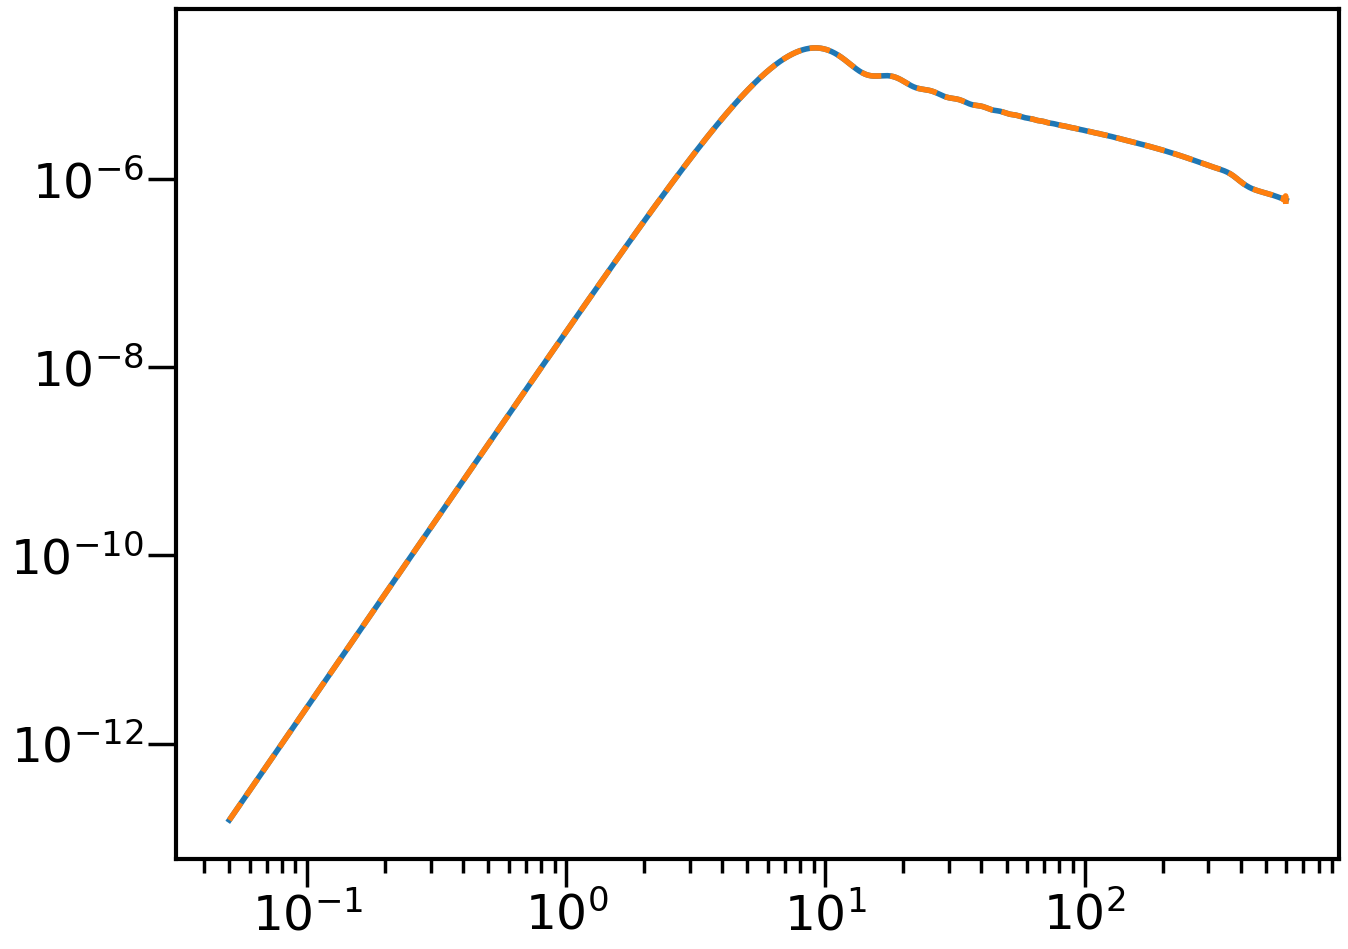

In [146]:
plot(th2*60,xi0_2ubc)
# plot(th2*60,xi0_2ub,':')
plot(th2*60,xi_c,'--')
xscale('log')
yscale('log')

In [147]:
th2*60

array([5.00000000e-02, 5.02354868e-02, 5.04720827e-02, ...,
       5.94387994e+02, 5.97187405e+02, 6.00000000e+02])

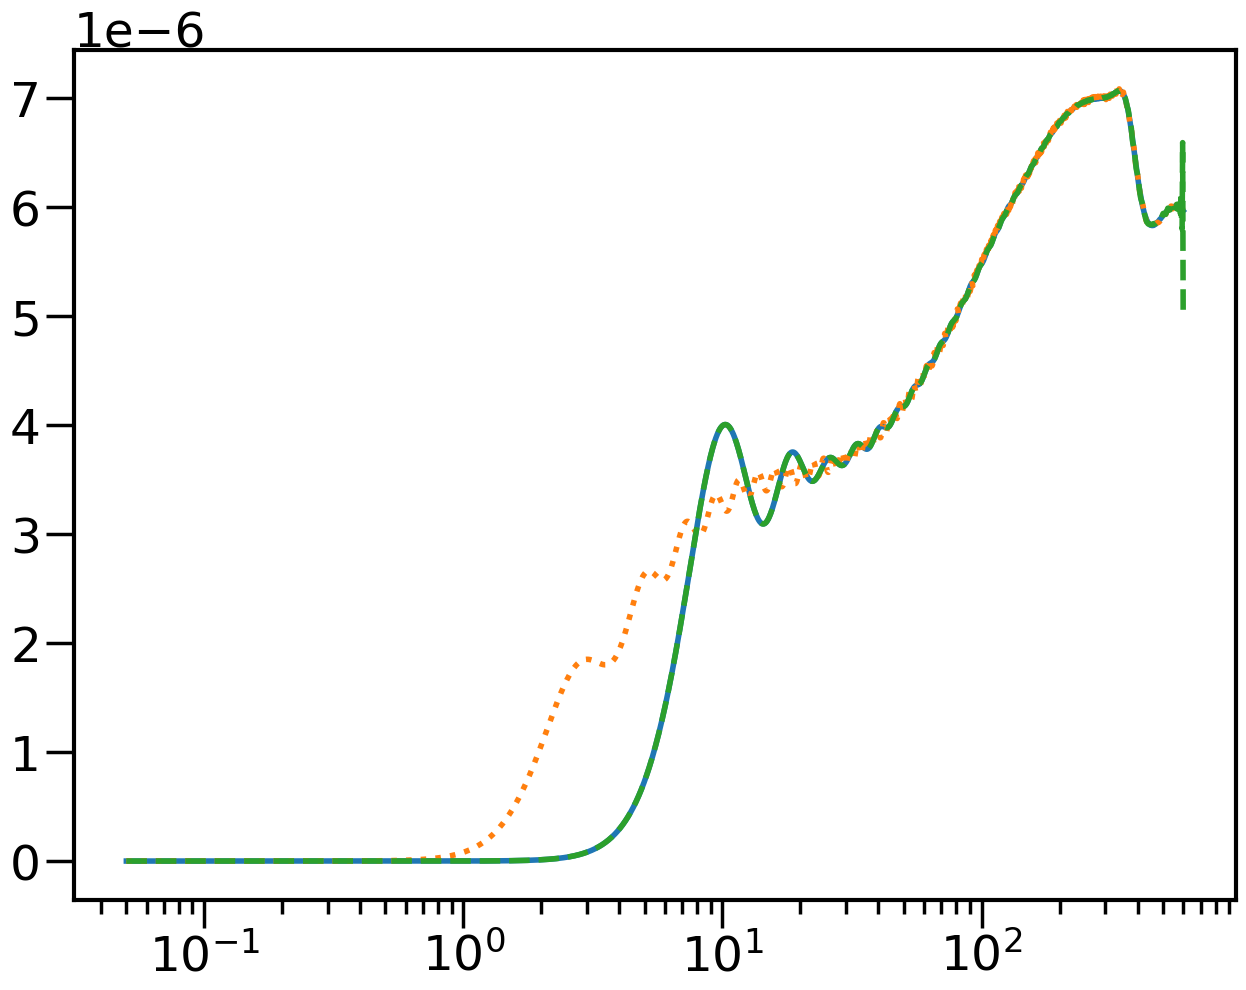

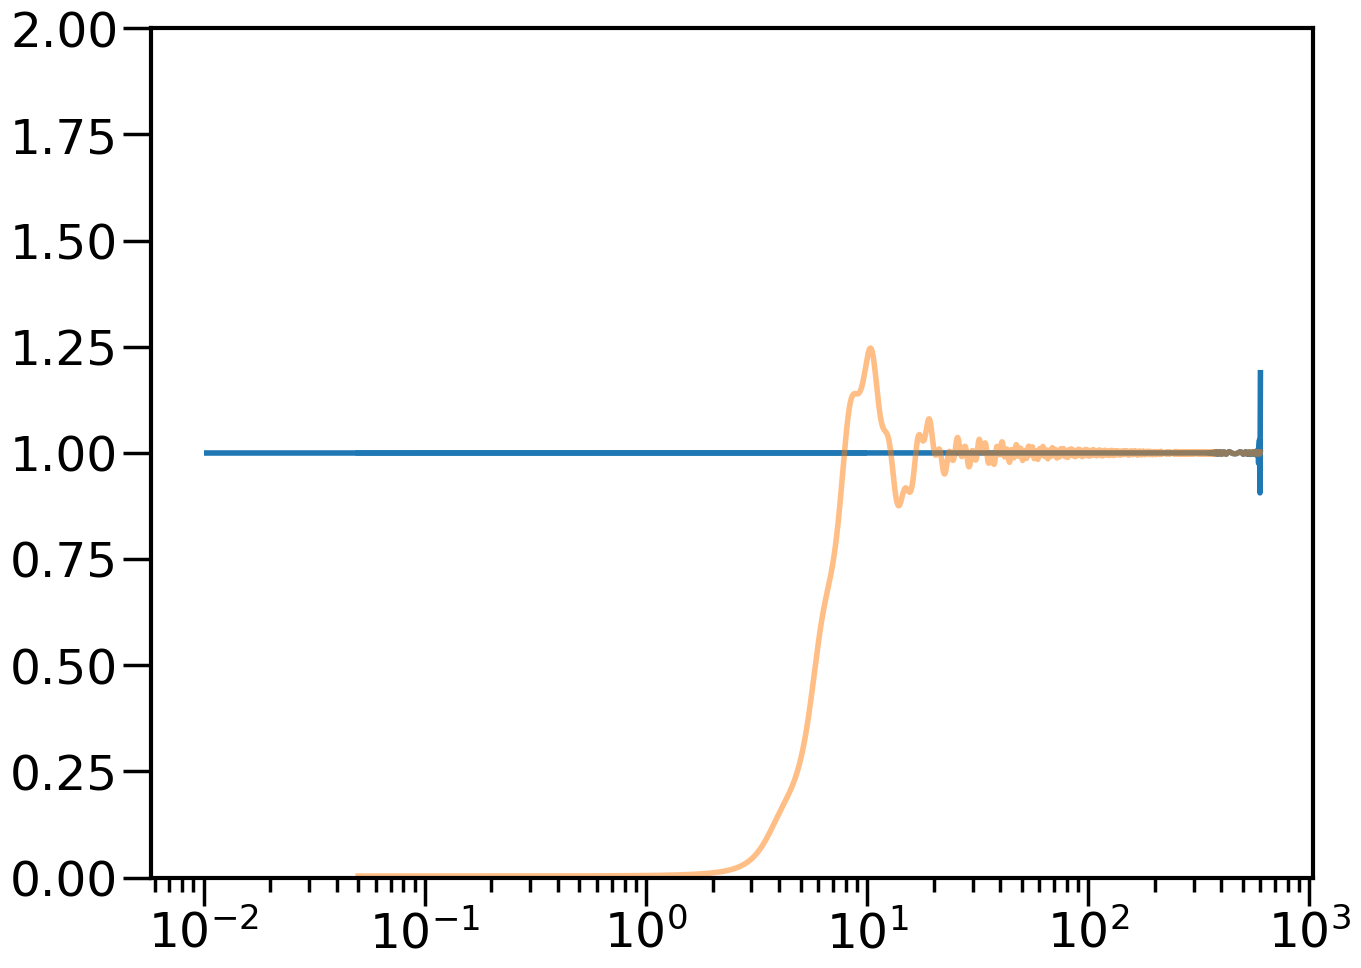

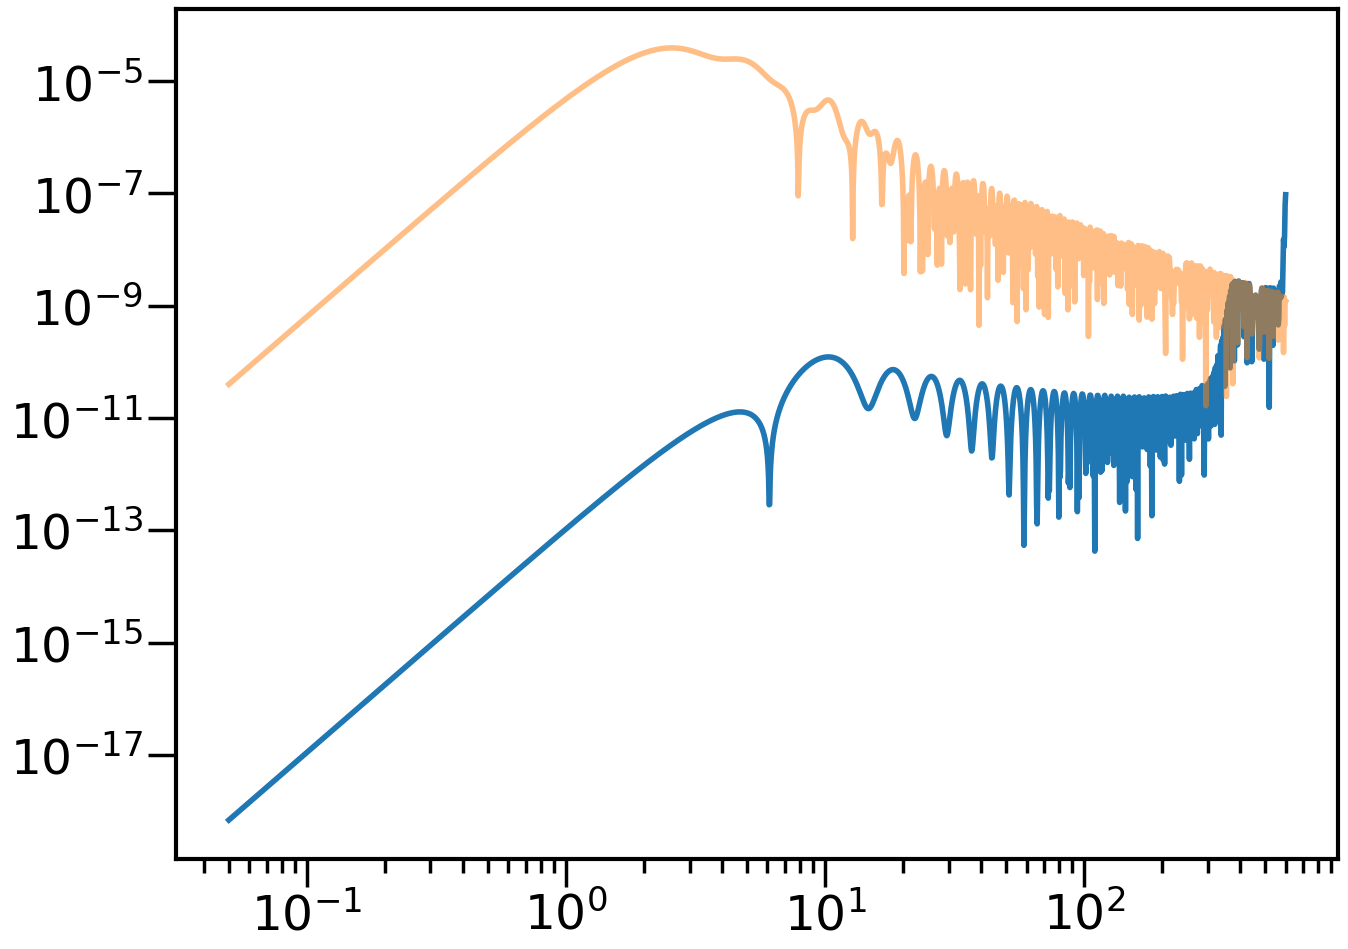

In [148]:
plot(th2*60,th2*xi0_2ubc)
plot(th2*60,th2*xi0_2ub,':')
plot(th2*60,th2*xi_c,'--')
xscale('log')
show()
plot(th2*60,xi0_2ubc/xi_c)
plot(th2*60,xi0_2ubc/xi0_2ub,alpha=0.5)
hlines(1,1.e-2,10)
xscale('log')
ylim(0,2)
show()
plot(th2*60,np.absolute(xi0_2ubc-xi_c))
plot(th2*60,np.absolute(xi0_2ubc-xi0_2ub),alpha=0.5)
# hlines(1,1.e-2,10)
xscale('log')
yscale('log')
# ylim(0,2)

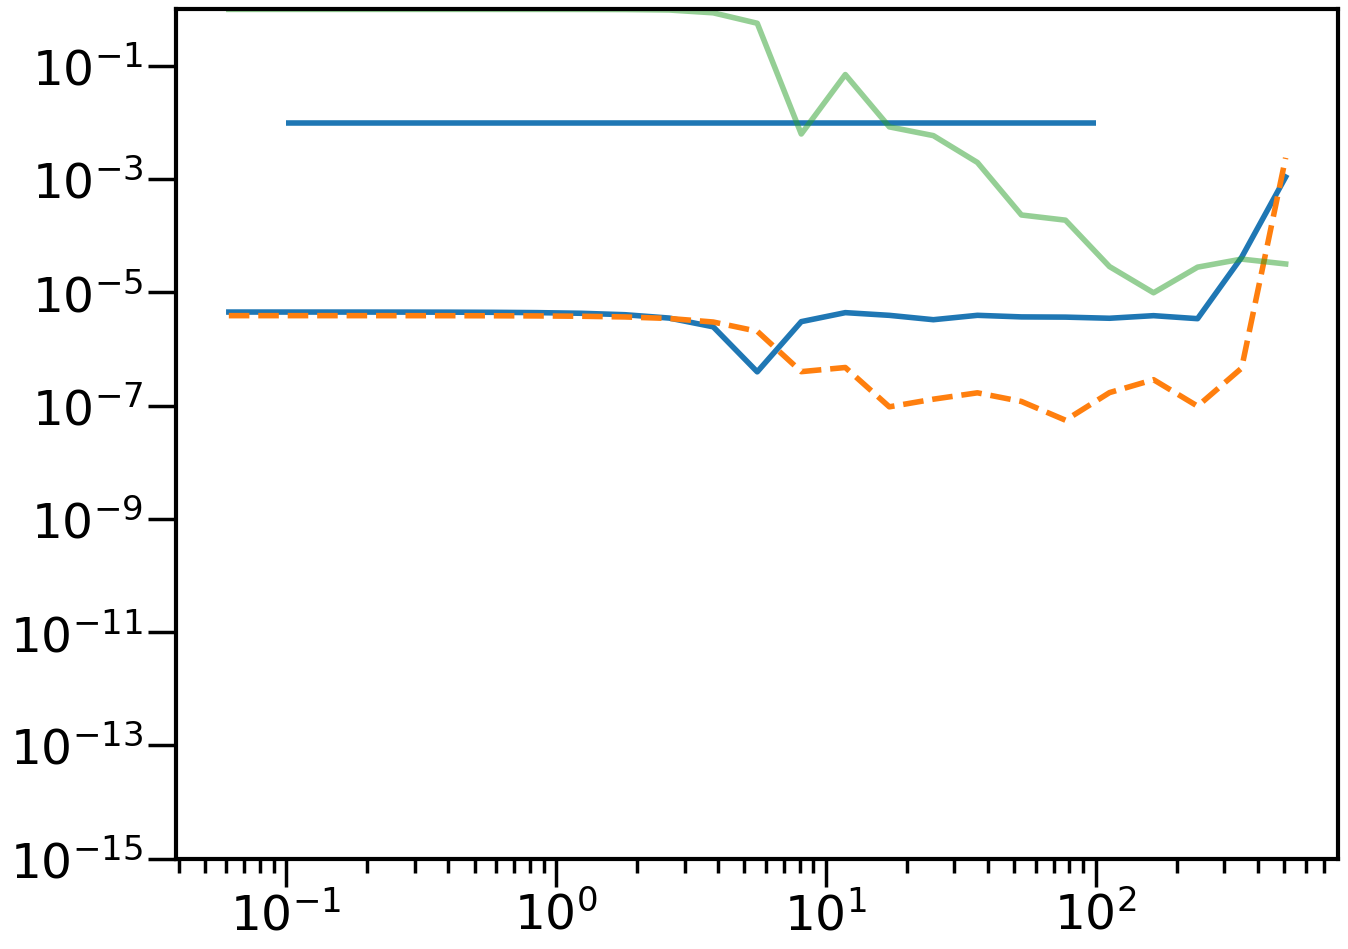

In [153]:
plot(thb2*60,np.absolute(xi0_2c/xi_cb-1))
plot(thb2*60,np.absolute(xi_cb2/xi_cb-1),'--')
plot(thb2*60,np.absolute(xi0_2c/xi0_2-1),alpha=0.5)
hlines(1.e-2,1.e-1,100)
xscale('log')
yscale('log')
ylim(1.e-15,1.e-0)
show()


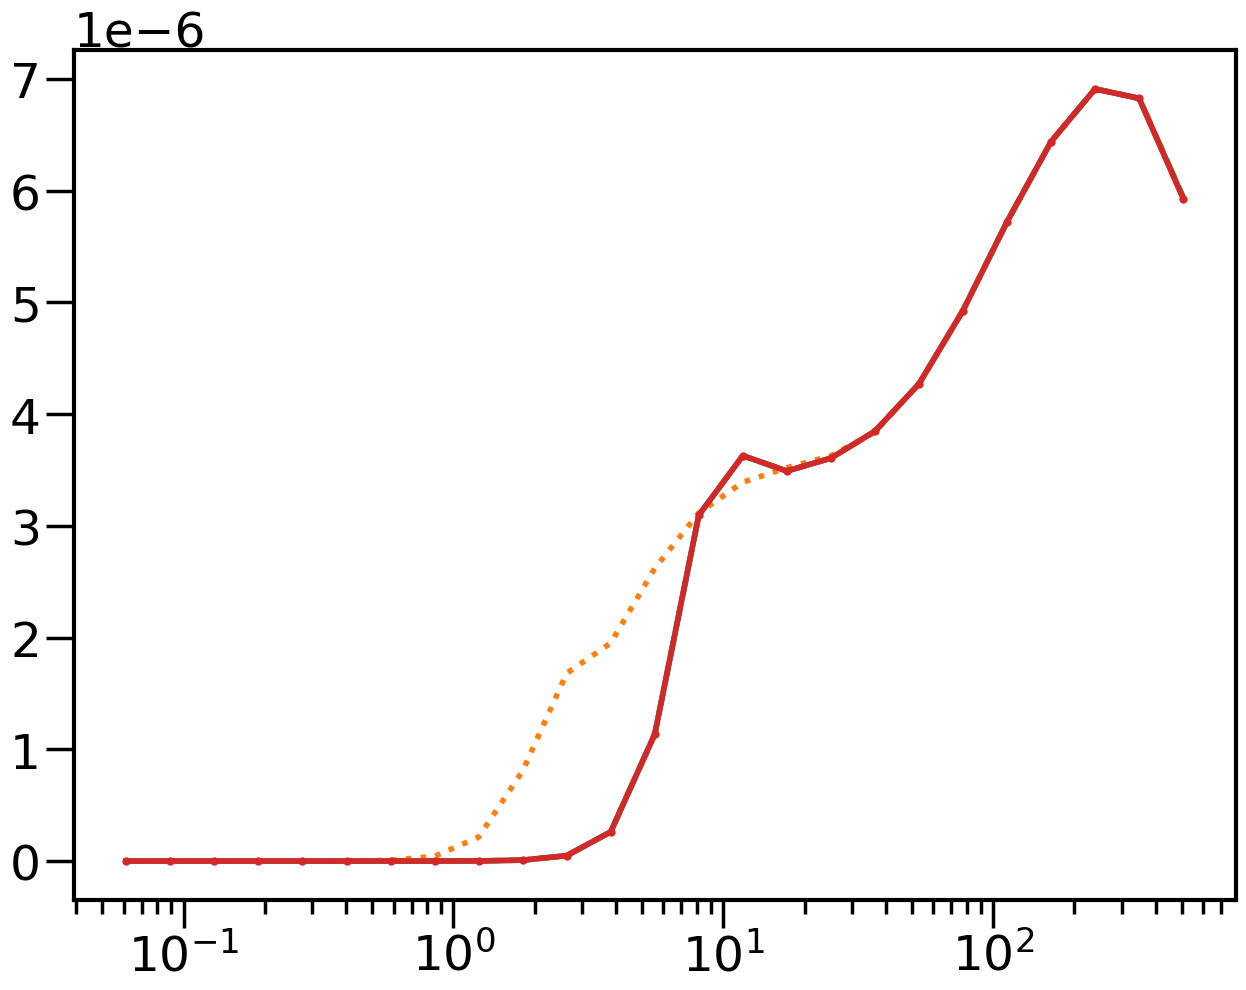

In [154]:
plot(thb2*60,thb2*xi0_2c)
plot(thb2*60,thb2*xi0_2,':')
plot(thb2*60,thb2*xi_cb,'--')
plot(thb2*60,thb2*xi_cb2,'.-')
xscale('log')
show()
# plot(th2,np.absolute(xi0_2ubc-xi_c))
# plot(th2,np.absolute(xi0_2ubc-xi0_2ub),alpha=0.5)
# # hlines(1,1.e-2,10)
# xscale('log')
# yscale('log')
# # ylim(0,2)

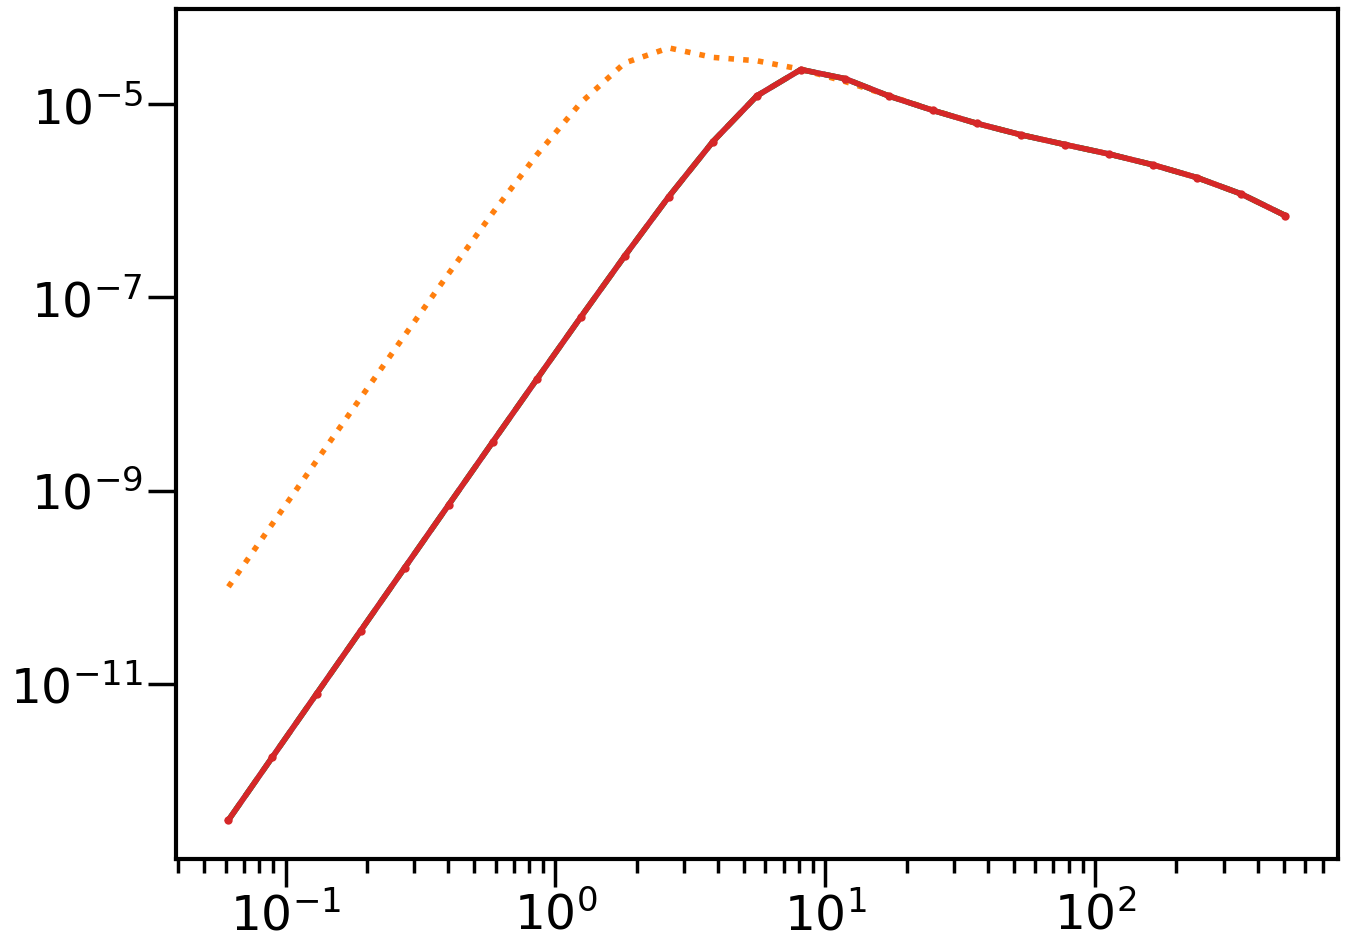

In [155]:
plot(thb2*60,xi0_2c)
plot(thb2*60,xi0_2,':')
plot(thb2*60,xi_cb,'--')
plot(thb2*60,xi_cb2,'.-')
xscale('log')
yscale('log')
show()
# plot(th2,np.absolute(xi0_2ubc-xi_c))
# plot(th2,np.absolute(xi0_2ubc-xi0_2ub),alpha=0.5)
# # hlines(1,1.e-2,10)
# xscale('log')
# yscale('log')
# # ylim(0,2)

In [156]:
thb2.shape

(25,)

In [180]:
corrs

[('galaxy', 'galaxy'), ('shear', 'shear'), ('galaxy', 'shear')]

saved to  ./figures/xi_convolve_all.pdf


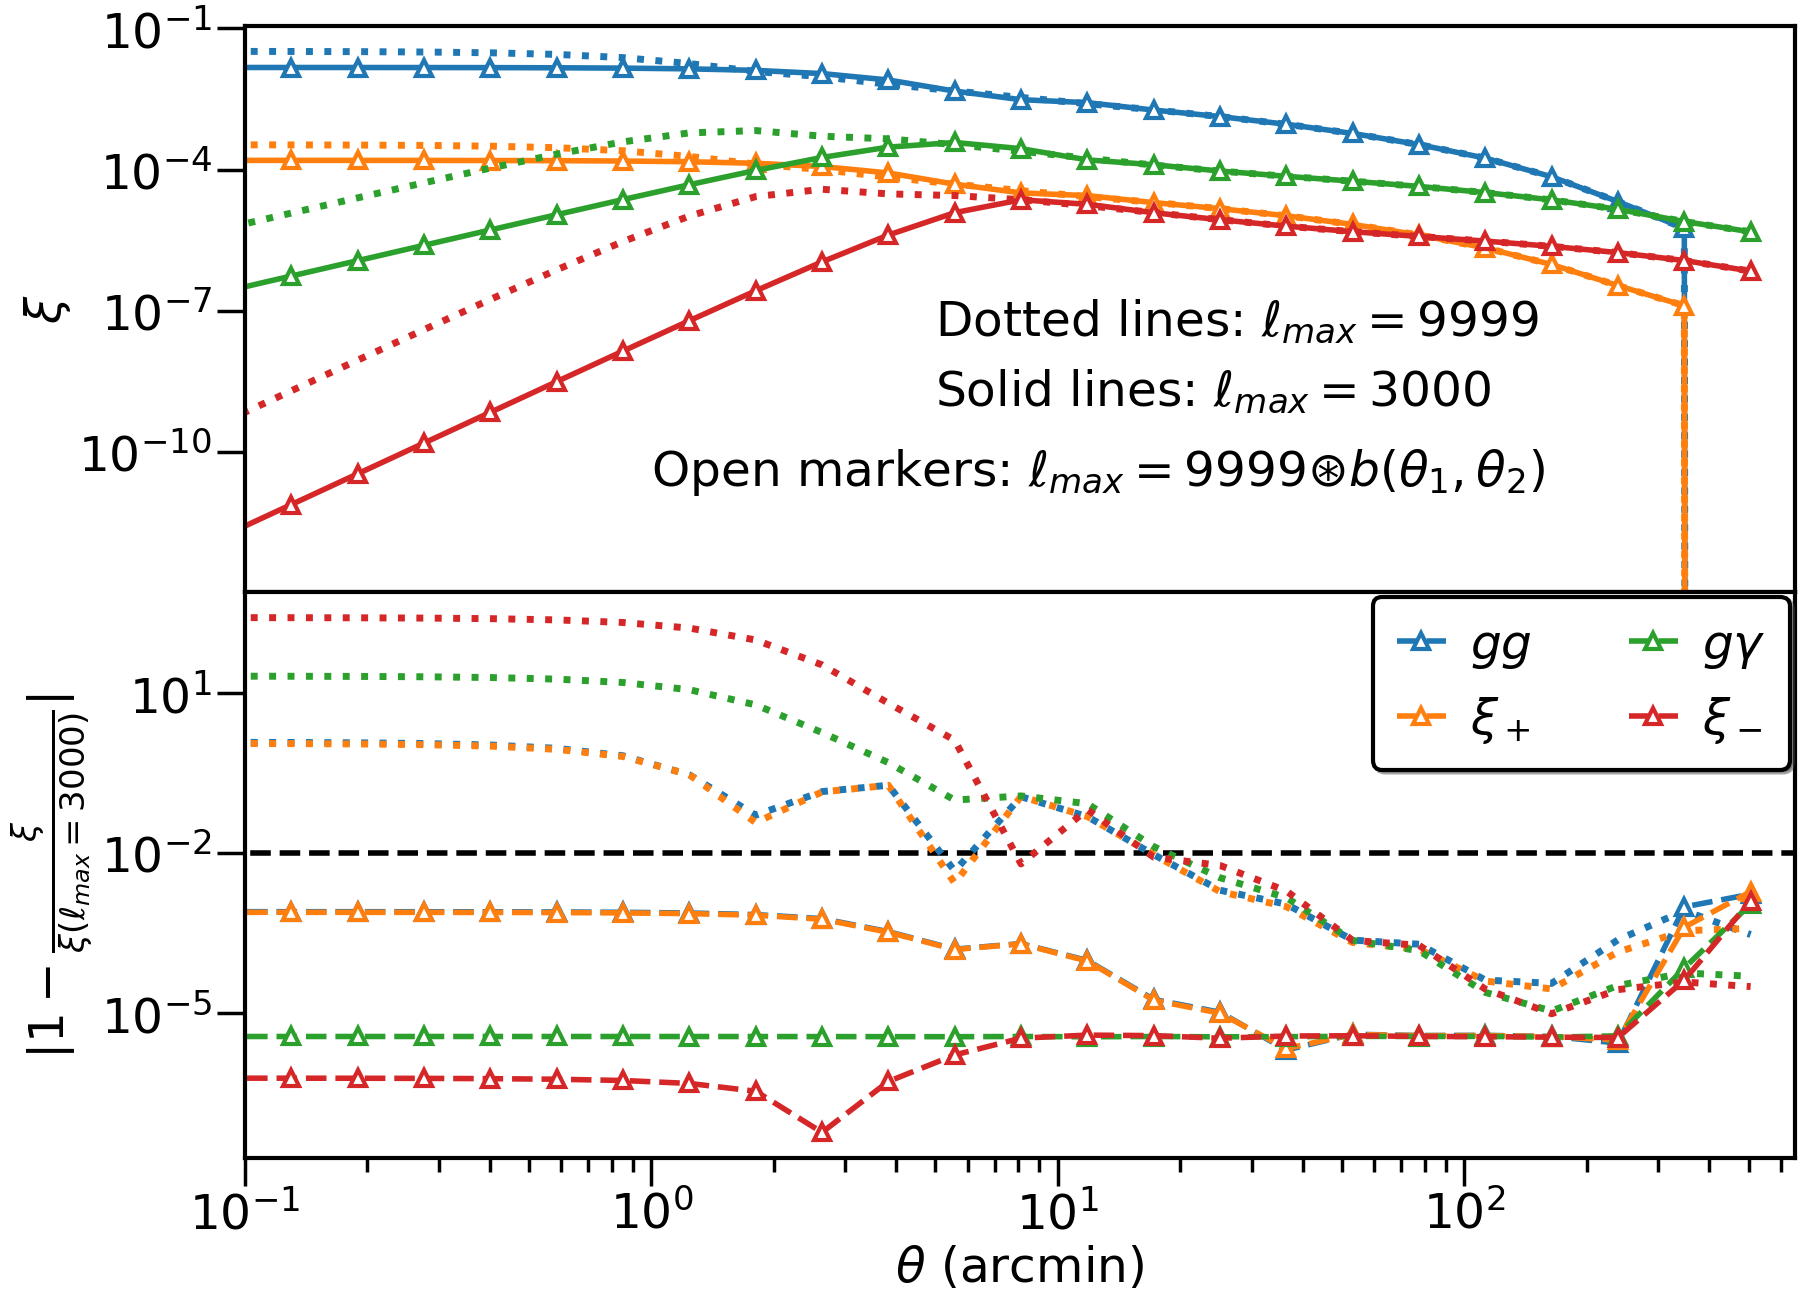

In [225]:
fig, ax =subplots(2,1,figsize=(20,15),sharex='col',sharey='row')
pS=ax[0]
pR=ax[1]
i=0
corrs2=corrs+[corr_ll]
s_pm=0
for corr in corrs2:
    j=0
    s=s1_s2s[corr]
    if corr==corr_ll:
        s=s1_s2s[corr][s_pm]
        s_pm+=1
    tt,xi0_2ub=WT2.projected_correlation(l_cl=l0_2,cl=cl0_2[corr][bi],s1_s2=s)
    tt,xi0_2ubc=WT2.projected_correlation(l_cl=l0_2,cl=cl0_2[corr][bi]*l_cut_weights,s1_s2=s)

    M=thc_m2[s]
    xi_c=M@(xi0_2ub)

    xi_cb=bb.bin_1d(xi=xi_c,bin_utils=xi_bu)

    xi0_2c=bb.bin_1d(xi=xi0_2ubc,bin_utils=xi_bu)
    xi0_2=bb.bin_1d(xi=xi0_2ub,bin_utils=xi_bu)

    M_b=bb.bin_2d_coupling(M=thc_m2[s],bin_utils=xi_bu,wt_b=1./xi0_2,wt0=xi0_2ub)
    xi_cb2=M_b@xi0_2


    pS.plot(thb2*60,xi0_2c,color=colors[i])#,marker=markers[j]) #label=r'$\ell_{max}='+str(l_max_cut)+'$'
    j+=1
    pS.plot(thb2*60,xi0_2,':',color=colors[i],lw=5)#
    pR.plot(thb2*60,np.absolute(xi0_2/xi0_2c-1),alpha=1,color=colors[i],ls=':',lw=5)#,marker=markers[j],ms=12)
    j+=1
    pS.plot(thb2*60*1.0,xi_cb2,'-',color=colors[i],marker=markers[j],mfc='white',mew=3,ms=12,lw=0) #
    pR.plot(thb2*60,np.absolute(xi_cb2/xi0_2c-1),'--',color=colors[i],marker=markers[j],mfc='white',mew=3,ms=12,label=r''+corr_labels[corr][s])

    i+=1


pR.set_xscale('log')
pS.set_yscale('log')
pR.set_yscale('log')
# pR.set_yscale('symlog',linthreshy=0.01)
# pR.set_ylim(0.001,1)
# pS.set_ylim(5.e-9,5.e-6)
pR.hlines(.01,1.e-2,2000,color='k',ls='--')

pR.set_xlim(1.e-1,650)
pR.set_xlabel(r'$\theta$ (arcmin)')
pR.set_ylabel(r'$|1-\frac{\xi}{\xi('+r'\ell_{max}='+str(l_max_cut)+')}|$')
pS.set_ylabel(r'$\xi$')

pS.text(x=5,y=3e-8,s=r'Dotted lines: $\ell_{max}='+str(l0_2.max())+'$')
pS.text(x=5,y=1e-9,s=r'Solid lines: $\ell_{max}='+str(l_max_cut)+'$')
pS.text(x=1,y=2e-11,s=r'Open markers: $\ell_{max}='+str(l0_2.max())+r'\circledast b(\theta_1,\theta_2)$')

pR.legend(loc='upper right',ncol=2)
fname='xi_convolve_all'
fname=fig_home+fname
fname+='.pdf'
fig.savefig(fname,bbox_inches='tight',format='pdf')
print('saved to ',fname)    
show()

<ipython-input-226-c717a9ed3682>:1: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  pcolor(thb2*60,thb2*60,np.absolute(M_b),norm=LogNorm(),cmap='Reds')


[]

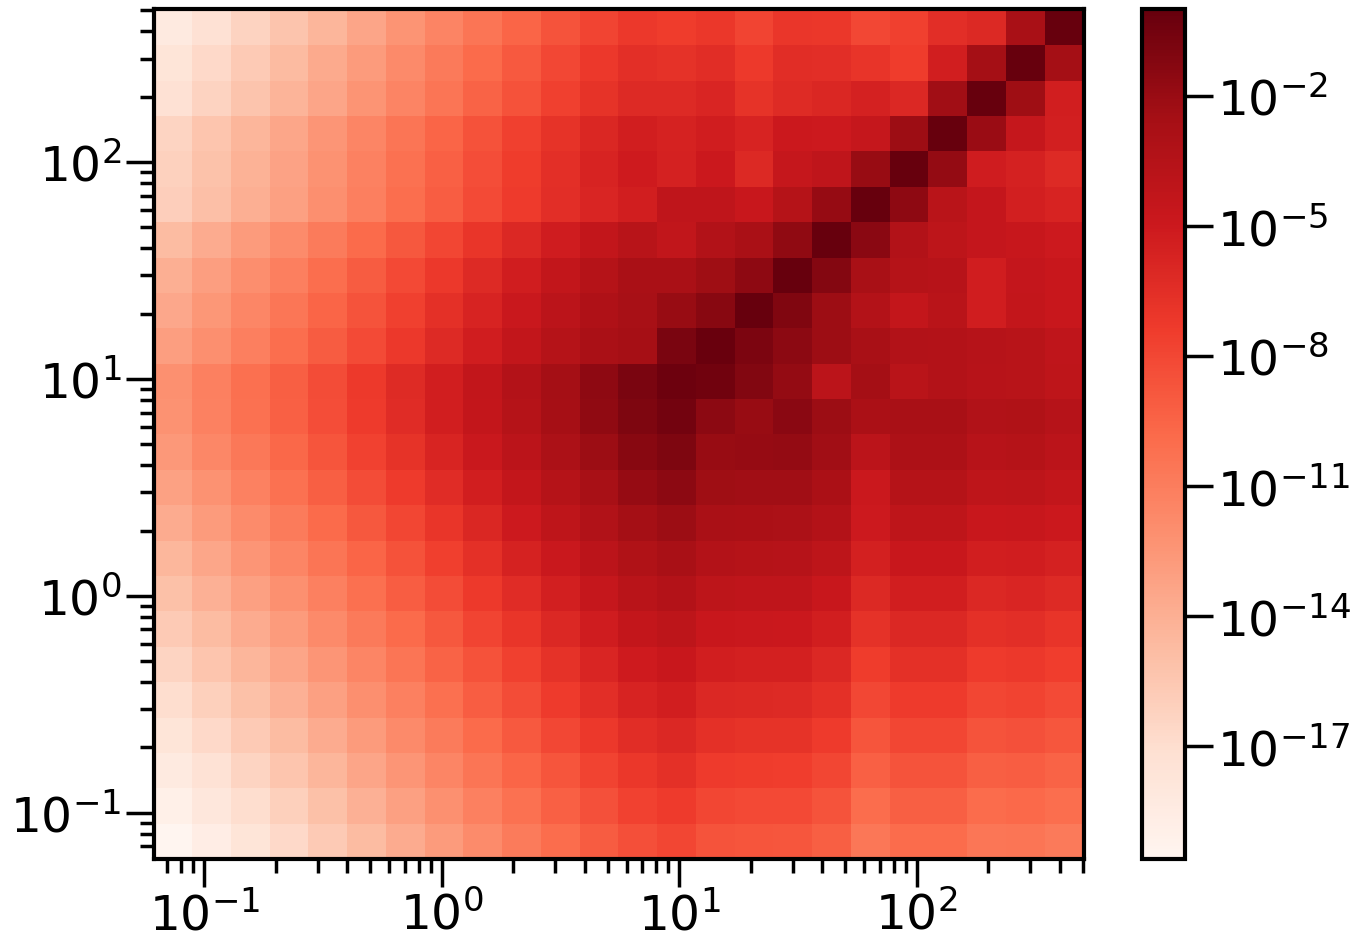

In [226]:
pcolor(thb2*60,thb2*60,np.absolute(M_b),norm=LogNorm(),cmap='Reds')
colorbar()
loglog()